# Homework Set 3

In [1]:
%pylab inline
import pandas as pd
import numpy as np

import fmt

Populating the interactive namespace from numpy and matplotlib


#### Unless explicitly forbidden, you can use any python functions from numpy/scipy to solve homework problems.

## Problem 1
$\renewcommand{bs}{\boldsymbol}$

We discussed three different ways of solving the least square problem of $\min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ in the lecture: 1) the pseudo-inverse $X^+$ 2) QR decomposition 3) SVD. 

1. if $X$ is not fully ranked, i.e., its column vectors are linearly dependent, do the three methods still work?
2. if not, can you propose an modifications to the QR method, so that you can find the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$ even when $X$ is rank deficient? Note that $\bs \beta$ is not unique when $X$ is not fully ranked, but there is still a deterministic answer to the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$. 
3. what is an easy and effective method to find a $\bs \beta$ that is good enough when $X$ is not fully ranked in practice?

Hint:
- It is also possible to make SVD work with rank deficient matrix. Please refer to http://www.cs.cornell.edu/Courses/cs3220/2010sp/notes/svd.pdf if you are interested.

### Problem 1 Solution:

1. <br>

1) For the pseudo-inverse $X^+$, we need to compute $X^+ = (X^TX)^{-1}X^T$, where $X^TX$ is not invertible when $X$ is not fully ranke. Hence pseudo-inverse $X^+$ cannot work.

2) For QR decomposition, suppose that the QR decomposition for $X$ is $X = QR$ where $R \in \mathbb{R}^{n \times n}$ is right triangular.

Then the solution $\beta$ is $\beta = R^{-1}\begin{bmatrix} y_1^{'} \\ \vdots \\ y_n^{'} \end{bmatrix}$ where $\begin{bmatrix} y_1^{'} \\ \vdots \\ y_n^{'} \end{bmatrix}$ is the first $n$ elements of $y^{'} = Q^Ty$. 

However, when $X$ is not fully ranked, $R$ is a singular matrix when. Hence QR decomposition cannot work.

3) For SVD, suppose that the SVD for $X$ is $X = USV^T$. 

Then we can compute $X^+$ by $X^+ = VS^+U^T$ where $S^+=(S^TS)^{-1}S^T$ is the pseudo-inverse of $S$. 

However, when $X$ is not fully ranked, $S$ is a singular matrix and $S^TS$ not invertible. Hence SVD cannot work.<br>

2. <br>

Suppose that $X \in \mathbb{R}^{m \times n}$, which is not full rank and $\text{rank}(X) = p < \text{min}(m, n)$

Then we can find $Q \in \mathbb{R}^{m \times n}, P \in \mathbb{R}^{n \times n}, R = \begin{bmatrix} R_1 & R_2 \\ 0 & 0 \end{bmatrix} \in \mathbb{R}^{n \times n}$ such that $XP = QR$,

where $Q$ is orthogonal, $P$ is a permutation matrix, and $R_1 \in \mathbb{R}^{p \times p}, R_2 \in \mathbb{R}^{p \times (n-p)}$ are upper triangular.

Then $\displaystyle \min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ becomes $\displaystyle \min_{\boldsymbol \beta}\Vert \begin{pmatrix} R_1R_2 \\ 0 \end{pmatrix}P^T\bs \beta - Q^T\boldsymbol y\Vert_2 \Rightarrow \bs \beta = P\begin{pmatrix} R_1^{-1}(y_1^{'} - R_2z_2) \\ z_2 \end{pmatrix}$, which is the solution of least square problem.

where $\displaystyle y_1^{'} \in \mathbb{R}^p$ is the first $p$ elements of $y^{'} = Q^Ty, \quad z_2 \in \mathbb{R}^{n-p}$ is any vector of length $n - p$. <br>

3. <br>

when $X$ is not fully ranked in practice, modified SVD seems an easy and effective method to find a $\bs \beta$.

Suppose that $X \in \mathbb{R}^{m \times n}$, which is not full rank and $\text{rank}(X) = p < \text{min}(m, n)$

Then the SVD for $X$ will be $X = \begin{bmatrix} U_1 & U_2 \end{bmatrix} \begin{bmatrix} S & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} V_1^T & V_2^T \end{bmatrix}$ where $U_1 \in \mathbb{R}^{m \times p}, U_2 \in \mathbb{R}^{m \times (m - p)}, V_1 \in \mathbb{R}^{n \times p}, V_2 \in \mathbb{R}^{n \times (n - p)}, S \in \mathbb{R}^{p \times p}$

We know that in this SVD, $S$ is not singular.

Then $\displaystyle \min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ becomes $\displaystyle \min_{\boldsymbol \beta}\Vert \begin{pmatrix} S & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} V_1^T \\ V_2^T \end{pmatrix}\bs \beta - \begin{pmatrix} U_1^T \\ U_2^T \end{pmatrix}\boldsymbol y\Vert_2 \Rightarrow \bs \beta = V_1 S^{-1} U_1^T \boldsymbol y$, which is the solution of least square problem.

The following problems use the same CMT treasury data set from the class:

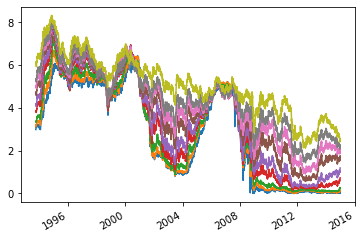

In [2]:
cmturl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/cmt.csv"
cmt_rates = pd.read_csv(cmturl, parse_dates=[0], index_col=[0])

cmt_rates.plot(legend=False);
tenors = cmt_rates.columns.map(float)
tenorTags = ['T=%g' % m for m in tenors]

## Problem 2

Take the covariance matrix $V$ estimated from the CMT historical levels, compute the following:
1. its L-2 condition number
2. its singular values, and the ratio between the largest and smallest singular values
3. Comment on whether there could be troubled area when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, if so, give an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

### Problem 2 Solution:

In [3]:
# Work for question 1

cv_rates = cmt_rates.cov() # covariance matrix V
inv_cv_rates = np.linalg.inv(cv_rates)  # inverse of covariance matrix V{-1}
L2cond_cv = np.linalg.cond(cv_rates, 2) # L-2 condition number for V
# display the result
fmt.displayDF(pd.DataFrame(L2cond_cv, columns = ["L-2"], index=['Condition number']), 
              "4g", fontsize=4)

,L-2
Condition number,7.472e+04


1. <br>

The L-2 condition number of the covariance matrix $V$ is showed above, which is $7.472e+04$.

In [4]:
# Work for question 2

svd_cv = np.linalg.svd(cv_rates) # perform SVD for covariance matrix V
S_cv = svd_cv[1] # retrieve the singular values from SVD for covariance matrix V
ratio_cv = np.amax(svd_cv[1])/np.amin(svd_cv[1]) # the ratio between the largest and smallest singular values
# display the result
col_names = np.arange(1, len(S_cv) + 1)
fmt.displayDF(pd.DataFrame(S_cv.reshape(1, len(S_cv)), columns = col_names, index=['Singular Value']), 
              "4g", fontsize=4)
print("The ratio between the largest and smallest singular values is:", ratio_cv)

,1,2,3,4,5,6,7,8,9
Singular Value,34.33,1.237,0.06246,0.01677,0.007389,0.002395,0.001502,0.0009641,0.0004595


The ratio between the largest and smallest singular values is: 74717.11096691823


2. <br>

The singular values for the covariance matrix $V$ is showed above.

The ratio between the largest and smallest singular values is 74717.11096691823, which is the same as the L-2 condition number.

In [5]:
# Work for question 3

# Set an original vector x and compute y = V^{-1}x by covariance matrix V
x_orig = np.ones(len(inv_cv_rates[0])).reshape(len(inv_cv_rates[0]), 1)
y_orig = np.matmul(inv_cv_rates, x_orig)
# Make pertubation to the original vector x and compute y = V^{-1}x after pertubation
x_pert = x_orig.copy()
x_pert[0] += 0.001
y_pert = np.matmul(inv_cv_rates, y_orig)
# display the result
fmt.displayDF(pd.DataFrame(np.concatenate((x_orig, y_orig, x_pert, y_pert)).reshape(4, len(inv_cv_rates[0])), columns = col_names, 
                           index=['Original x', 'Original y', 'Pertubation x', 'Pertubation y']), "4g", fontsize=4)

,1,2,3,4,5,6,7,8,9
Original x,1,1,1,1,1,1,1,1,1
Original y,0.4218,6.255,-6.586,-3.314,8.832,-11.91,-3.596,12.48,-0.5287
Pertubation x,1.001,1,1,1,1,1,1,1,1
Pertubation y,"-1,494","7,007","-6,240",-1.108e+04,2.271e+04,-1.684e+04,-389.3,"8,909","-2,102"


3. <br>

From the result showed above, we may conclude that there would be troubled area when computing $\bs y = V^{-1} \bs x$ from this covariance matrix $V$.

When the original vector $x_{\text{orig}} = \begin{bmatrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\end{bmatrix}^T$, the resulting $\bs y = V^{-1} \bs x$ is $y_{\text{orig}} = \begin{bmatrix} 0.4218 & 6.255 & -6.586 & -3.314	& 8.832 & -11.91 & -3.596 & 12.48 & -0.5287\end{bmatrix}^T$

However, when we make a pertubation to $x_{\text{orig}}$ and get that $x_{\text{pert}} = \begin{bmatrix} 1.001 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\end{bmatrix}^T$, the resulting $y_{\text{pert}} = \begin{bmatrix} -1,494 & 7,007 & -6,240 & 	-1.108e+04 & 2.271e+04	& -1.684e+04 & 	-389.3 & 8,909 & -2,102\end{bmatrix}^T$

$x_{\text{orig}}$ is close to $x_{\text{pert}}$ but $y_{\text{orig}}$ is extremely different from $y_{\text{pert}}$.

## Problem 3

From the interest rate historical data, 
1. estimate the covariance of the daily interest rate **changes**
2. run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. Note that the correlation matrix can be viewed as the covariance matrix with the normalized risk factors. Make sure you take the normalization into account when comparing the eigenvectors. Try to find a clear way to illustrate their equivalence of the eigen vectors or the lack of.
3. from your results, how many principal components are required to explain 95% of the variance of rate changes? 
4. Plot these principal components of the covariance matrix that account for 95% of the variance and try to give economic explanations of what mode of rates changes they represent.
4. plot the history of PCA scores, i.e., the factor loading (or the projection) to the first 3 principal components, of the historical data.
4. write a program to simulate the daily interest rate **changes** up to the future time of 20Y using the first few principal components of the **changes** that accounted for 95% of the variance. From your simulated IR change paths, re-estimate the covariance matrix of the **changes**, then comapre it to the original covariance matrix estimated from historical data. (think of a suitable metric for the comparison). You can assume that the daily rates changes are independent normals, and there are 250 business days per year. 
5. obtain the IR **levels** from the simulated paths of changes in the previous step, and compute the following statistical metrics of the IR **level** distributions: mean, standard deviation, 2% and 98% quantiles. Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates. Make any reasonable assumptions on the starting interest rate term structure. 
6. [extra credit] Compute the 2% and 98% quantile of the historical 1Y and 10Y rate levels, and comment on if the simulated levels from the previous step matches the historical quantiles.
6. [extra credit] Comment on what could be done to make the simulated IR term structure more realistic. And which is a more suitable choice, PCA on IR levels or changes? Does your answer depend on your application?

Hints:
* numpy has a build in random number generator package, numpy.random.
* cumsum, percentile are useful functions from numpy, you can use them to simplify your code
* for step 6, since the principal components are orthogonal, you can simply drive the change simulation using independent normal random numbers. Don't forget to take into account the eigen values in your simulation, i.e., the eigen values are the variance along the direction of the principal components. 
* for step 7, the levels are the sum of initial curve and daily changes, numpy.cumsum is a useful function to compute cumulative sums.

### Problem 3 Solution:

In [6]:
# work for quetion 1

# make linear interpolation for missing interest rated data
cmt_rates_P3 = cmt_rates.replace(0, np.nan).interpolate(method = 'linear')
# compute daily interest rate changes
IR_changes = cmt_rates_P3.diff()
IR_changes_cov = IR_changes.cov() # covariance matrix
# display the result
fmt.displayDFs(IR_changes_cov, headers=['Covariance'], fontsize=4, fmt="4f")

1. <br>

The covariance matrix of the daily interest rate changes is showed above.

In [7]:
# work for quetion 2

IR_changes_corr = IR_changes.corr() # correlation matrix
val_cov, vec_cov = np.linalg.eig(IR_changes_cov) # PCA for covariance matirx
val_corr, vec_corr = np.linalg.eig(IR_changes_corr) # PCA for correlation matrix
S = np.diag(np.sqrt(np.diag(IR_changes_cov))) # compute risk factors in covariance matrix
# normalize pricincal components for covariance matrix by risk factors
val_cov_norm = np.diag((np.matmul(np.matmul(np.linalg.inv(S), np.diag(val_cov)), np.linalg.inv(S))))
# display the result
fmt.displayDF(pd.DataFrame(np.concatenate((val_cov, val_cov_norm, val_corr)).reshape(3, len(val_corr)), columns = col_names, 
                           index=['Principal components for covariance matrix', 'Principal components for normalized covariance matrix', 
                                  'Principal Components for correlation matrix']), "4g", fontsize=4)

,1,2,3,4,5,6,7,8,9
Principal components for covariance matrix,0.02248,0.004008,0.001291,0.0005061,0.0002398,0.0001794,0.0001159,7.573e-05,8.512e-05
Principal components for normalized covariance matrix,7.952,2.083,0.6206,0.1535,0.06471,0.04368,0.02805,0.02042,0.0266
Principal Components for correlation matrix,6.619,1.53,0.4171,0.2008,0.1022,0.05714,0.01884,0.02251,0.03233


2. <br>

The principal components for covariance matrix, normalized covariance matrix and correlation matrix are showed above.

We may find that the principal components for normalized covariance matrix and correlation matrix are similar, and are quite different from principal components for covariance matrix.

Hence the principal components for normalized covariance matrix and correlation matrix are equivalent.

In [8]:
# work for question 3

# compute the proportion of the variance of rate changes explained by first k principal components, k = 1,...,9
# proportion for principal components of covariance matrix
percent_cov = np.cumsum(val_cov)/sum(val_cov)*100
# proportion for principal components of normalized covariance matrix
percent_cov_norm = np.cumsum(val_cov_norm)/sum(val_cov_norm)*100
# proportion for principal components of correlation matrix
percent_corr = np.cumsum(val_corr)/sum(val_corr)*100
# display the result
fmt.displayDF(pd.DataFrame(np.concatenate((col_names, percent_cov, percent_cov_norm, percent_corr)).reshape(4, len(val_corr)), 
                           columns = col_names, index=['Number of principal components(PCs)', 
                                                       'Variance explained by PCs for covariance matrix', 
                                                       'Variance explained by PCs for normalized covariance matrix', 
                                                       'Variance explained by PCs for correlation matrix']), "4g", fontsize=4)

,1,2,3,4,5,6,7,8,9
Number of principal components(PCs),1,2,3,4,5,6,7,8,9
Variance explained by PCs for covariance matrix,77.57,91.4,95.85,97.6,98.43,99.05,99.45,99.71,100
Variance explained by PCs for normalized covariance matrix,72.34,91.29,96.93,98.33,98.92,99.32,99.57,99.76,100
Variance explained by PCs for correlation matrix,73.54,90.55,95.18,97.41,98.55,99.18,99.39,99.64,100


3. <br>

From the results showed above, $3$ principal components are required to explain $95\%$ of the variance of rate changes.

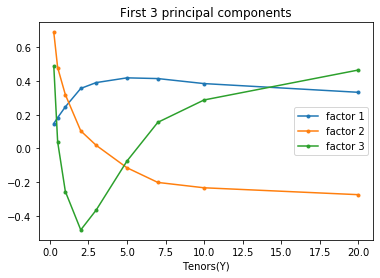

In [9]:
# work for question 4
# code for this part basically from lecture notebook

pc_lab = ['factor %d' % i for i in range(1, 4)]
plot(tenors, vec_cov[:, :3], '.-');
xlabel('Tenors(Y)')
legend(pc_lab, loc='best')
title('First 3 principal components');

4. <br>

The first $3$ principal components of the covariance matrix that account for $95\%$ of the variance is showed above.

The first component is a roughly straight line, which represents the general level of tenors.

The second component is a decreasing line, which represents how rapidly the yield curve goes down from short-term rates to long-term rates.

The third component has a butterfly shape that occurs between short-term, medium-term and long-term rates. The value decrease rapidly when tenors is between 0 and 2.5 years, then increase when the tenors is greater than 2.5 years.

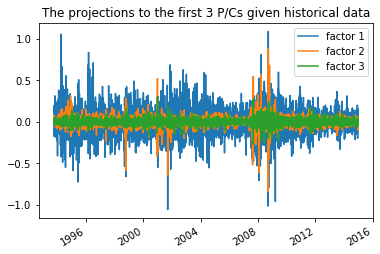

In [10]:
# work for question 5
# code for this part basically from lecture notebook

pcProjections = IR_changes.dot(vec_cov).iloc[:, :3]
pcProjections.plot(title='The projections to the first 3 P/Cs given historical data')
legend(pc_lab, loc='best');

5. <br>

The projection to the first 3 principal components, given the historical data, is showed above.

In [11]:
# work for question 6

# set seed
np.random.seed(11078211)

# compute historical mean
IRchanges_normal_mean = np.array(np.mean(IR_changes)).reshape(len(IR_changes_cov), 1)
# generate random path for IR changes
# 20 years, 250 business days per year, so totally 20 * 500 days
sim_z = np.random.multivariate_normal(np.zeros(3), np.identity(3), 20 * 250 - 1)
# using first 3 principal components to compute IR changes for each step in this path
sim_IRchanges = np.matmul(np.matmul(vec_cov[:,0:3], np.sqrt(np.diag(val_cov[0:3]))), sim_z.T) + np.tile(IRchanges_normal_mean, (1, 20 * 250 - 1))
# re-estimate the covariance matrix
sim_cov = np.cov(sim_IRchanges)
# display the result
maturity_names = ['0.25', '0.5', '1','2','3','5','7','10','20']
fmt.displayDFs(pd.DataFrame(sim_cov, columns = maturity_names, index = maturity_names), 
               headers=['Simulated path covariance'], fontsize=4, fmt="4f")
print("The L-2 norm of the difference between historical covariance matrix and simulated covariance matrix is:", 
      np.linalg.norm(IR_changes_cov - sim_cov, 2))

The L-2 norm of the difference between historical covariance matrix and simulated covariance matrix is: 0.00050609893063238


6. <br>

The procedure for simulating the daily interest rate changes is showed above.

The covariance matrix of the changes from simulated IR change paths is showed above.

We found that the L-2 norm of the difference between historical covariance matrix and simulated covariance matrix is $0.00050609893063238$, which is close to $0$. Hence they are approximately the same.

Text(0.5, 1.0, 'The evolution of statistical metrics over time for the 10Y term rates')

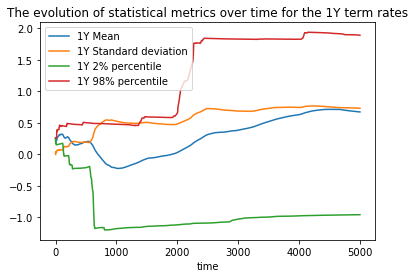

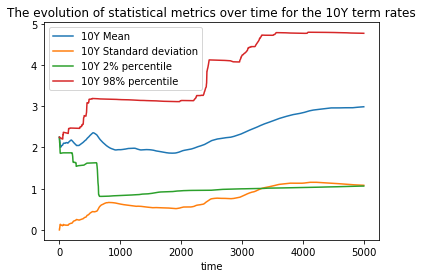

In [12]:
# work for question 7 

import matplotlib.pyplot as plt
%matplotlib inline

# compute the IR levels from the simulated paths of changes in the previous step
# we predict future, so starting interest rate could be the interest rate at the latest time
init_IR = np.array(cmt_rates_P3.iloc[-1,]).reshape(len(cmt_rates_P3.iloc[-1,]), 1)
sim_IR = np.concatenate((init_IR, sim_IRchanges), axis = 1)
sim_IR = np.cumsum(sim_IR, axis = 1)
# compute the statistical metrics for: mean, standard deviation, 2% and 98% quantiles, for each tenors
sim_mean = np.mean(sim_IR, axis = 1)
sim_std = np.std(sim_IR, axis = 1)
sim_q2 = np.quantile(sim_IR, 0.02, axis = 1)
sim_q98 = np.quantile(sim_IR, 0.98, axis = 1)
# display the result
fmt.displayDFs(pd.DataFrame(np.concatenate((sim_mean, sim_std, sim_q2, sim_q98)).reshape(4, len(cmt_rates_P3.iloc[-1,])),
                           columns = maturity_names, index = ["Mean", "Standard deviation", "2% quantile", "98% quantile"]),
               headers=['Statistical metrics of the IR for different tenors'], fontsize=4, fmt="4f")

# initial array to record evolution of these statistical metrics over time 
# for the 1Y and 10Y term rates separately
mean_1Y, std_1Y, q2_1Y, q98_1Y = np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0]))
mean_10Y, std_10Y, q2_10Y, q98_10Y = np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0])), np.zeros(len(sim_IR[0]))
# loop and compute statistical metrics for each time point
for i in range(len(sim_IR[0])):
    mean_1Y[i] = np.mean(sim_IR[2,:i + 1]) # 1Y mean
    std_1Y[i] = np.std(sim_IR[2,:i + 1]) # 1Y std
    q2_1Y[i] = np.quantile(sim_IR[2,:i + 1], 0.02) # 1Y 2% quantile
    q98_1Y[i] = np.quantile(sim_IR[2,:i + 1], 0.98) # 1Y 98% quantile
    mean_10Y[i] = np.mean(sim_IR[7,:i + 1]) # 10Y mean
    std_10Y[i] = np.std(sim_IR[7,:i + 1]) # 10Y std
    q2_10Y[i] = np.quantile(sim_IR[7,:i + 1], 0.02) # 10Y 2% quantile
    q98_10Y[i] = np.quantile(sim_IR[7,:i + 1], 0.98) # 10Y 98% quantile
# plot the result
plt.figure()
plt.plot(mean_1Y, label = "1Y Mean")
plt.plot(std_1Y, label = "1Y Standard deviation")
plt.plot(q2_1Y, label = "1Y 2% percentile")
plt.plot(q98_1Y, label = "1Y 98% percentile")
plt.legend(loc = 0)
plt.xlabel("time")
plt.title("The evolution of statistical metrics over time for the 1Y term rates")
plt.figure()
plt.plot(mean_10Y, label = "10Y Mean")
plt.plot(std_10Y, label = "10Y Standard deviation")
plt.plot(q2_10Y, label = "10Y 2% percentile")
plt.plot(q98_10Y, label = "10Y 98% percentile")
plt.legend(loc = 0)
plt.xlabel("time")
plt.title("The evolution of statistical metrics over time for the 10Y term rates")

7. <br>

The statistical metrics of the IR level distributions: mean, standard deviation, 2% and 98% quantiles, for each tenors is showed above.

The plots for the evolution of these statistical metrics over time for the 1Y and 10Y term rates are showed above as well.

In [13]:
# work for question 8

q2_1Y_actual = cmt_rates_P3.quantile(0.02)['1']
q98_1Y_actual = cmt_rates_P3.quantile(0.98)['1']
q2_10Y_actual = cmt_rates_P3.quantile(0.02)['10']
q98_10Y_actual = cmt_rates_P3.quantile(0.98)['10']
fmt.displayDFs(pd.DataFrame([[sim_q2[2], sim_q2[7]],[q2_1Y_actual, q2_10Y_actual], [sim_q98[2], sim_q98[7]], 
                             [q98_1Y_actual, q98_10Y_actual]], columns = ["1Y", "10Y"], 
                            index = ["Simulated 2% quantile", "Historical 2% quantile", 
                                     "Simulated 98% quantile", "Historical 98% quantile"]),
               headers=['Comparison between simulated and historical 1Y and 10Y rate levels'], fontsize=4, fmt="4f")

8. <br>

From the results showed above, we know that $2\%$ and $98\%$ quantile of the historical 1Y rate level is $0.1000$ and $6.3700$, and the $2\%$ and $98\%$ quantile of the historical 10Y rate level is $1.7100$ and $7.4400$.

However, the simulated path indicate that $2\%$ and $98\%$ quantile of the 1Y rate level is $-0.9555$ and $1.8892$, and the $2\%$ and $98\%$ quantile of the 10Y rate level is $1.0638$ and $4.7714$, which are extremely different from the historical result.

9. <br>

In the previous part, the IR term structure is simulated by $\mathrm{d}r = r\mathrm{d}t + s\mathrm{d}W_t$ where $r$ is the historical mean of IR change. The historical mean is less than zero so the IR level given by simulation is lower than usual.

To make the simulated IR term structure more realistic, we should apply Vasicek model $\mathrm{d}r = (u - r)\mathrm{d}t + s\mathrm{d}W_t$, where $u$ is a parameter that force the IR to change in a range, so the IR level will be consistent, no super low or super high IR happened. 

For PCA analysis, according to all PCA application showed above, PCA on IR levels will be more suitable Because PCA on IR can maintain the level of IR, then they will not deviate their general level so much.